# OPTION PRICING- THEORITICAL / FAIR VALUE CALCULATION

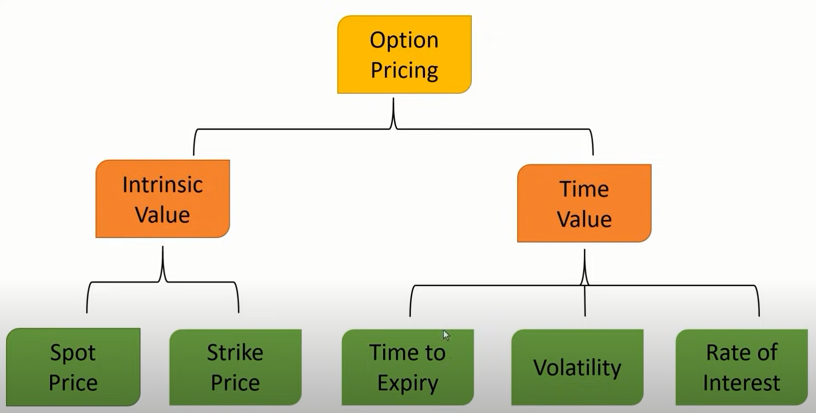

# Black-Scholes-Merton (BSM) model:

 Fischer Black, Myron Scholes and Robert C. Merton

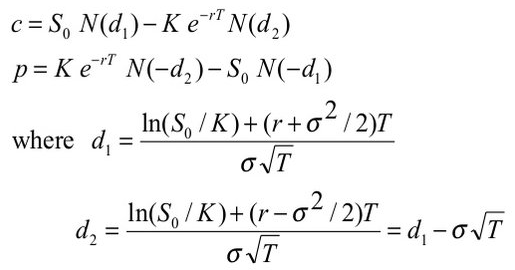

    C = Call Option price
    P= Put Option price
    S= Spot Price of Underlying
    K= Strike Price of Underlying
    r= Risk free Rate of Interest
    T= Time to Expiry
    sigma= Impiled volatility
    N= cumulative distribution function (CDF) of Normal Distribution
    d1 & d2 = Probabilities of option will be in the money
BSM model Assumptions:

    The option should European and can only be exercised at expiration
    The returns of the underlying asset are normally distributed
    The risk-free rate and volatility of the underlying asset are constant
    No Dividend and Transaction cost

In [3]:
#import libraries
import numpy as np
from scipy.stats import norm
from py_vollib.black_scholes import black_scholes as bs

In [221]:
#variable
S=  17854.05
K= 17750
r= 0.10
T= 6/365
sigma= 0.0839

In [224]:
#BSM Model to calculate Option Price
d1=(np.log(S/K)+((r+sigma**2/2)*T))/ (sigma*np.sqrt(T))
d2=d1-(sigma*np.sqrt(T))
call=S*norm.cdf(d1,0,1)-norm.cdf(d2,0,1)*K*np.exp(-r*T)
put=norm.cdf(-d2,0,1)*K*np.exp(-r*T)-S*norm.cdf(-d1,0,1)

In [225]:
d2

0.6907908036063432

In [178]:
call

160.71996394883536

In [212]:
put

81.0132197165558

In [87]:
#cross check
from py_vollib.black_scholes import black_scholes as bs
Call_price = bs('c', S, K, T, r, sigma)
Put_price = bs('p', S, K, T, r, sigma)

In [88]:
Call_price

180.94667347664517

In [89]:
Put_price

48.608231203255386

# OPTION GREEKS
### 1. Delta  ( Δ=∂P/∂S)  (Call Δ=N(d1))   (Put Δ=N(d1)−1)
- Delta is the rate of change on the option’s price with respect to changes in the price of the underlying asset
-Delta is very useful, because it is the number of shares to buy (or sell) to hedge out the risk of changes in the underlying stock’s price when short a call (or put) option.
-In other words, if you have a portfolio short 1 call option and long Delta shares of stock, then your portfolio is riskless (over very short time periods). This is referred to as delta hedging.
-Similarly, a portfolio short one put and short Detla shares of stock is riskless.
-Call Deltas range from 0 to 1, and put Deltas range from -1 to 0.

### 2. Gamma (Γ =∂2P/∂S2) (Γ=N'(D1)/S σ √T) for both Call & put
- Gamma is the rate of change of the option’s Delta with respect to changes in the underlying asset.
- The higher the Gamma (in absolute value) the more often you’ll need to rebalance a delta-neutral portfolio.
- To create a Gamma-neutral portfolio, you’ll have to trade in an option on the underlying asset – or some derivative which is not linearly related to the underlying asset.

### 3. Vega (v=∂P/∂σ)  V = S √T N'(D1) for both Call & put
- Vega is the rate of change of the option premium with respect to the volatility of the underlying asset.
- Vega is simply quoted as the change in the option’s price for each 1% change in volatility.If the Vega of a put option is 40, then a 1% increase in volatility increases the value of the option by 1%×40=$0.40

### 4. Theta (Θ= ∂P/∂T) 
#### Call Θ = − (S σ N'(d1)) / (2√T) − r K e^−rT N(d2)     
#### Put Θ = − (S σ N'(d1)) / (2√T) + r K e^−rT N(-d2)
- Theta is the rate of change of the option premium with respect to time. It is also known as the option’s time decay.
-Theta is usually negative, which means as time passes the option’s premium declines (all other variables held constant).
-Theta is calculated in years, but if we divide theta by 252, we get the daily decline in the option premium solely due to time decay.
-For example, say Theta is -25, then in days Theta is −25/252=−0.09921. which means all else constant, the option’s price will decline by $0.09921 per day.
-Theta is often quoted as this time decay per day (-0.9921 above).

### 5. Rho (ρ=∂P/∂r)  (  Call ρ = K T  e^−rT N(d2)  and  Put ρ = − K T e^−rT  N(−d2)  )
- Rho is the rate of change of the option premium with respect to the risk-free rate of interest.
- Rho is positive for Call & negative for put, if int rate increase price of call will increase and price of put will decrease and vice versa
- For example, say for a Call option Rho is 30.Then, if the risk-free rate increases by 1%, the option’s value will increase by 1%×30=$0.30
- Often Rho is simply quoted as the change in the option’s price for each 1% change in the risk-free rate (the 0.30 above).

## Calculating of Option Greeks for Nifty of Strike Price 17750 both call and Put

In [216]:
#delta
call_delta=norm.cdf(d1,0,1)
put_delta=norm.cdf(d1,0,1)-1
#gamma
gamma=norm.pdf(d1,0,1) / (S*sigma*np.sqrt(T))
#vega
vega=(S*np.sqrt(T)*norm.pdf(d1,0,1))/100
#theta
call_theta=-S*sigma*norm.pdf(d1,0,1)/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2)
call_theta=call_theta/365
put_theta=-S*sigma*norm.pdf(d1,0,1)/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2)
put_theta=put_theta/365
#rho
call_rho= (K*T*np.exp(-r*T)*norm.cdf(d2,0,1))/100
put_rho= (-K*T*np.exp(-r*T)*norm.cdf(-d2,0,1))/100

import pandas as pd
greeks_call=pd.DataFrame()
greeks_call=greeks_call.append({'Call_Price':call,'Call_Delta':call_delta,'Call_gamma':gamma,'Call_Vega':vega,'Call_Theta':call_theta,'Call_Rho':call_rho},ignore_index=True)
greeks_put=pd.DataFrame()
greeks_put=greeks_put.append({'put_Price':put,'put_Delta':put_delta,'put_gamma':gamma,'put_Vega':vega,'put_Theta':put_theta,'put_Rho':put_rho},ignore_index=True)

In [217]:
greeks_put

,put_Delta,put_Price,put_Rho,put_Theta,put_Vega,put_gamma
0,-0.345963,81.01322,-1.028689,-8.916305,8.442715,0.001066


In [218]:
greeks_call

,Call_Delta,Call_Price,Call_Rho,Call_Theta,Call_Vega,Call_gamma
0,0.654037,214.217333,1.884327,-13.771331,8.442715,0.001066
